file apple01.wav sampling_freq 8000 shape (2694,) type int16 duration 0.34 seconds


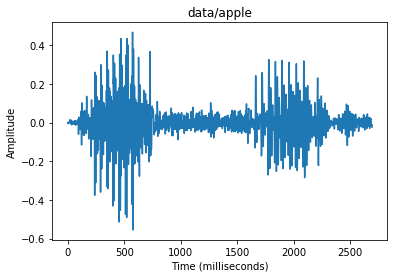

file banana01.wav sampling_freq 8000 shape (3437,) type int16 duration 0.43 seconds


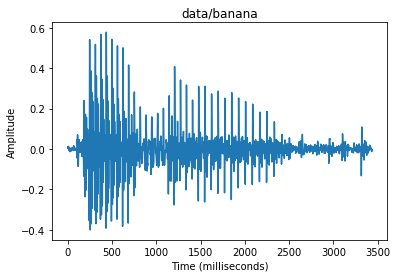

file kiwi01.wav sampling_freq 8000 shape (3344,) type int16 duration 0.42 seconds


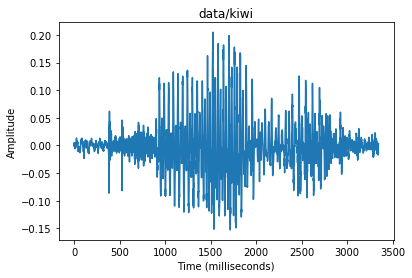

file lime01.wav sampling_freq 8000 shape (3716,) type int16 duration 0.46 seconds


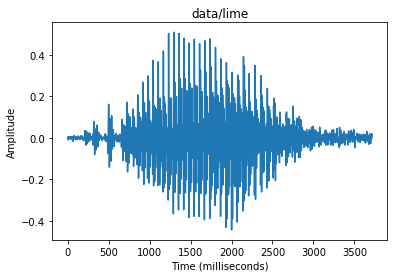

file orange01.wav sampling_freq 8000 shape (6038,) type int16 duration 0.75 seconds


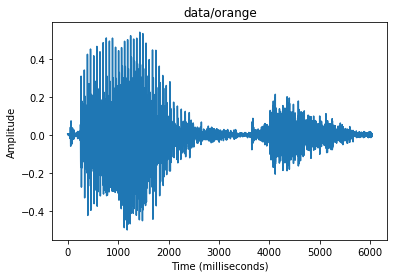

file peach01.wav sampling_freq 8000 shape (4922,) type int16 duration 0.62 seconds


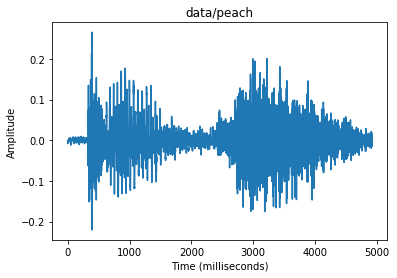

file pineapple01.wav sampling_freq 8000 shape (4551,) type int16 duration 0.57 seconds


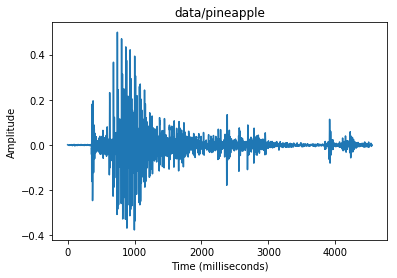

In [4]:
import os
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

input_folder = 'data'
mfcc_features=defaultdict(list)
filterbank_features = defaultdict(list)
for dirname in os.listdir(input_folder):
    subfolder = os.path.join(input_folder, dirname)
    if not os.path.isdir(subfolder):
        continue
    for filename in [x for x in os.listdir(subfolder) if x.endswith('.wav')][0:1]:
        label = subfolder[subfolder.rfind('/') + 1:]
        filepath = os.path.join(subfolder, filename)
        sampling_freq, audio = wavfile.read(filepath)
        print('file', filename, 'sampling_freq', sampling_freq, 'shape', audio.shape,
              'type', audio.dtype,
              'duration', round(audio.shape[0]/float(sampling_freq), 2), 'seconds')
        
        mfcc_f = mfcc(audio, sampling_freq)
        mfcc_features[label].append(mfcc_f)
        
        filterbank_f = logfbank(audio, sampling_freq)
        filterbank_features[label].append(filterbank_f)
        
        audio = audio / np.power(2,15)
        time_axis = 1000 * np.arange(0, audio.shape[0])
        plt.plot(np.arange(audio.shape[0]), audio)
        plt.xlabel('Time (milliseconds)')
        plt.ylabel('Amplitude')
        plt.title(subfolder)
        plt.show()

apple mfcc shape (33, 13)


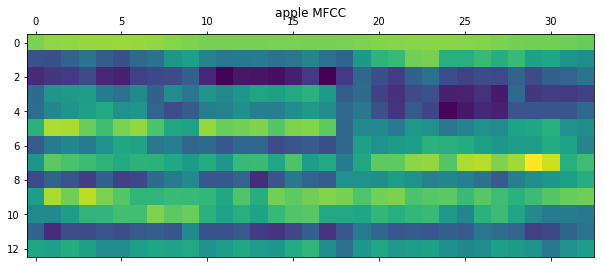

banana mfcc shape (42, 13)


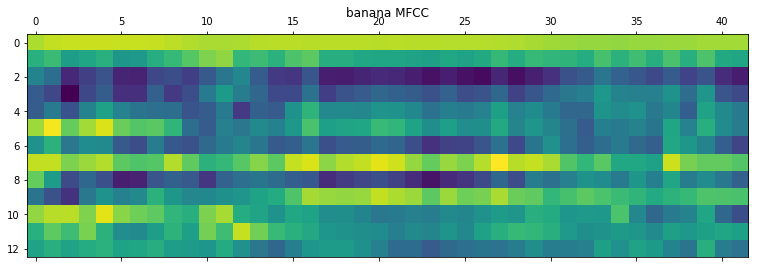

kiwi mfcc shape (41, 13)


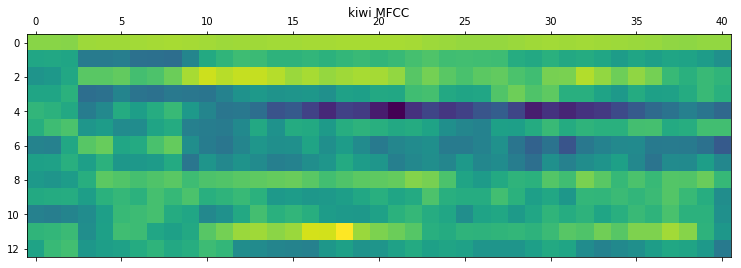

lime mfcc shape (45, 13)


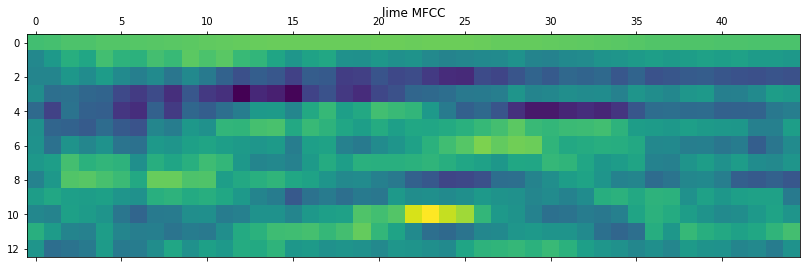

orange mfcc shape (74, 13)


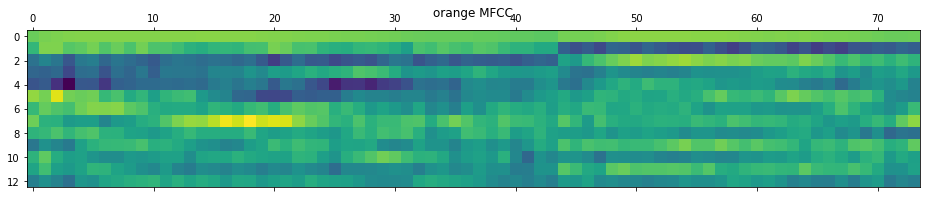

peach mfcc shape (61, 13)


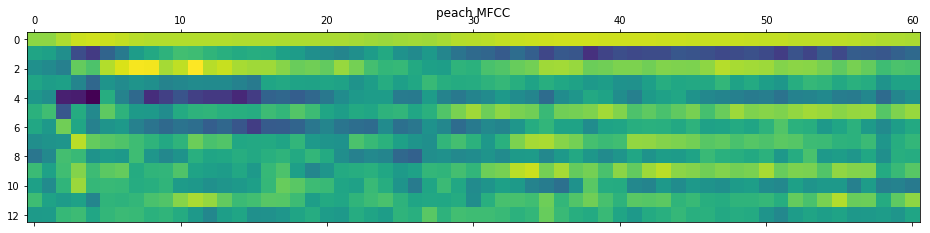

pineapple mfcc shape (56, 13)


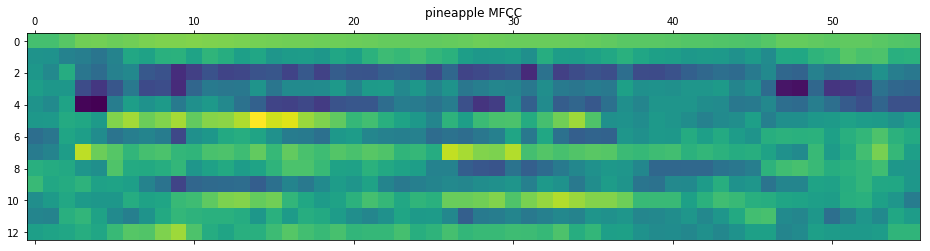

In [35]:
for k, v in mfcc_features.items():
    for features in v:
        print(k, 'mfcc shape', features.shape)
        plt.matshow(features.T)
        plt.title(k + ' MFCC')
        plt.show()
        

apple filterbank shape (33, 26)


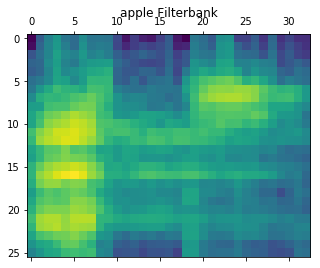

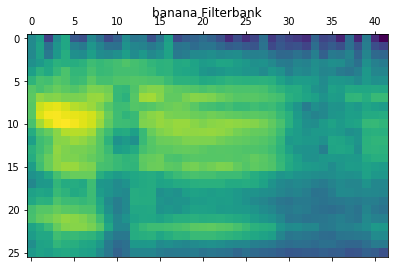

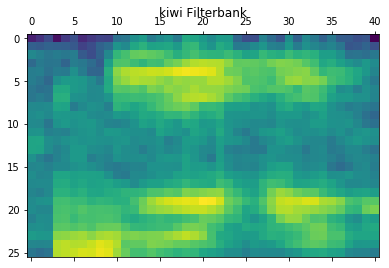

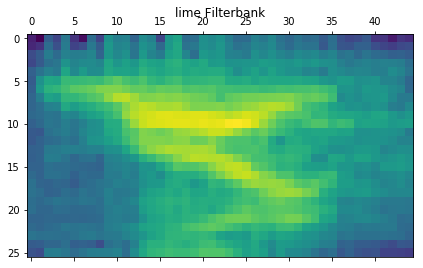

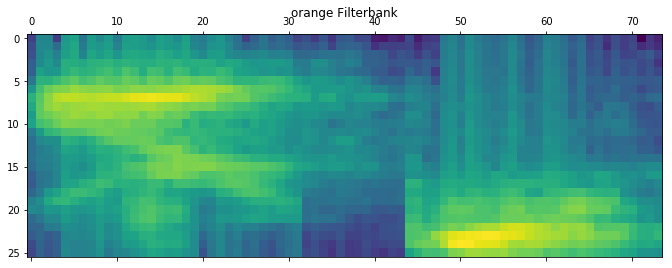

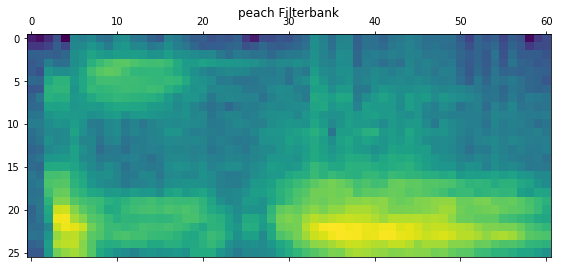

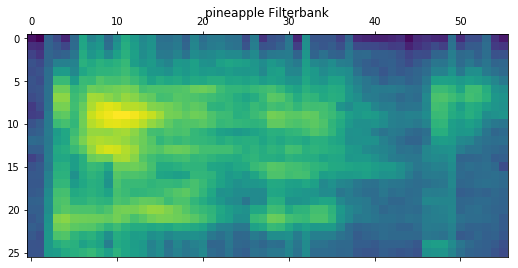

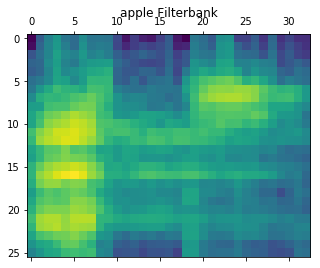

banana filterbank shape (42, 26)


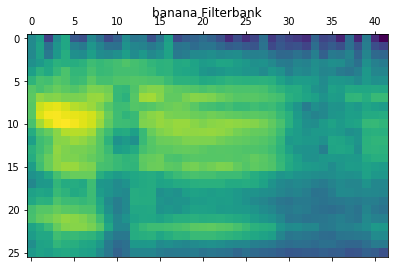

kiwi filterbank shape (41, 26)


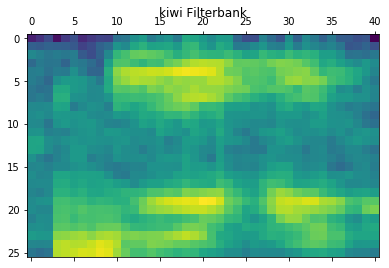

lime filterbank shape (45, 26)


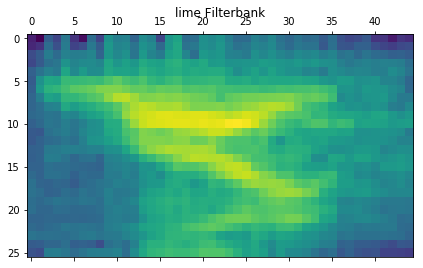

orange filterbank shape (74, 26)


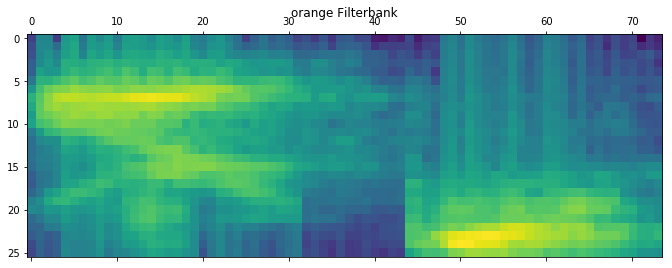

peach filterbank shape (61, 26)


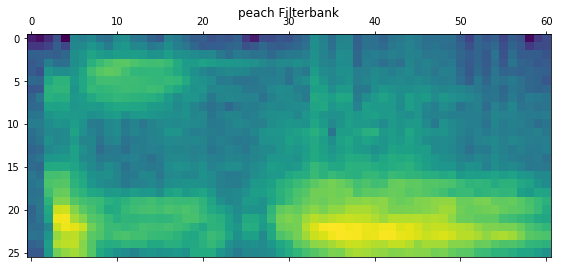

pineapple filterbank shape (56, 26)


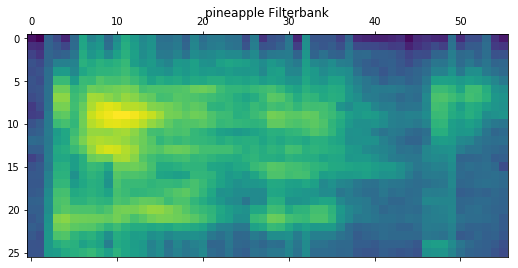

In [37]:
for k, v in filterbank_features.items():
    for features in v:
        print(k, 'filterbank shape', features.shape)
        plt.matshow(features.T)
        plt.title(k + ' Filterbank')
        plt.show()
        